# Pi-filter
Last update: 12 Feb 2024  

![Pi filter](Pi-Filter.png){#fig-pi-filter}  



## Introduction

[electronics stackexchange](https://electronics.stackexchange.com/)

Am trying to apply the FACTS method to find out the transfer function for this circuit as shown below. This is a Pi-filter circuit with all its component parasitics and also including the source and load resistances. I would like to find out the transfer function of this circuit and match its plot from Mathcad with simulation.

What is the FACTS method?  

@fig-pi-filter


@user15174


## Circuit description
test test

## Circuit analysis
 
- find the transfer function


The net list for the filter is:
```
* C:\users\jeff64\My Documents\Pi-filter\Pi-Filter.asc
V1 8 0 1
R1 1 8 1
R2 1 4 1
R3 3 1 1
R4 2 3 1
R5 2 6 1
R6 2 0 1
L1 4 5 1 Rser=0
L2 3 2 1 Rser=0
L3 6 7 1 Rser=0
C1 5 0 1
C2 2 3 1
C3 7 0 1
.op
.backanno
.end
```

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

In [2]:
t = symbols('t',positive=True)  # t > 0

### Load the netlist
The netlist generated by LTSpice is pasted into the cell below and some edits were made to remove the inductor series resistance and the independent sources are set to their DC values.

In [3]:
net_list = '''
V1 8 0 1
R1 1 8 1
R2 1 4 1
R3 3 1 1
R4 2 3 1
R5 2 6 1
R6 2 0 1
L1 4 5 1
L2 3 2 1 
L3 6 7 1 
C1 5 0 1
C2 2 3 1
C3 7 0 1
'''

Generate the network equations.

In [4]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [5]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$v_{1} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{3}} - \frac{v_{4}}{R_{2}} - \frac{v_{8}}{R_{1}} = 0$<br>$- I_{L2} + v_{2} \left(C_{2} s + \frac{1}{R_{6}} + \frac{1}{R_{5}} + \frac{1}{R_{4}}\right) + v_{3} \left(- C_{2} s - \frac{1}{R_{4}}\right) - \frac{v_{6}}{R_{5}} = 0$<br>$I_{L2} + v_{2} \left(- C_{2} s - \frac{1}{R_{4}}\right) + v_{3} \left(C_{2} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{1}}{R_{3}} = 0$<br>$I_{L1} - \frac{v_{1}}{R_{2}} + \frac{v_{4}}{R_{2}} = 0$<br>$C_{1} s v_{5} - I_{L1} = 0$<br>$I_{L3} - \frac{v_{2}}{R_{5}} + \frac{v_{6}}{R_{5}} = 0$<br>$C_{3} s v_{7} - I_{L3} = 0$<br>$I_{V1} - \frac{v_{1}}{R_{1}} + \frac{v_{8}}{R_{1}} = 0$<br>$v_{8} = V_{1}$<br>$- I_{L1} L_{1} s + v_{4} - v_{5} = 0$<br>$- I_{L2} L_{2} s - v_{2} + v_{3} = 0$<br>$- I_{L3} L_{3} s + v_{6} - v_{7} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [6]:
NE_sym

⎡              ⎛1    1    1 ⎞   v₃   v₄   v₈            ⎤       
⎢           v₁⋅⎜── + ── + ──⎟ - ── - ── - ──            ⎥       
⎢              ⎝R₃   R₂   R₁⎠   R₃   R₂   R₁            ⎥       
⎢                                                       ⎥       
⎢           ⎛       1    1    1 ⎞      ⎛        1 ⎞   v₆⎥       
⎢-I_L2 + v₂⋅⎜C₂⋅s + ── + ── + ──⎟ + v₃⋅⎜-C₂⋅s - ──⎟ - ──⎥       
⎢           ⎝       R₆   R₅   R₄⎠      ⎝        R₄⎠   R₅⎥   ⎡0 ⎤
⎢                                                       ⎥   ⎢  ⎥
⎢             ⎛        1 ⎞      ⎛       1    1 ⎞   v₁   ⎥   ⎢0 ⎥
⎢   I_L2 + v₂⋅⎜-C₂⋅s - ──⎟ + v₃⋅⎜C₂⋅s + ── + ──⎟ - ──   ⎥   ⎢  ⎥
⎢             ⎝        R₄⎠      ⎝       R₄   R₃⎠   R₃   ⎥   ⎢0 ⎥
⎢                                                       ⎥   ⎢  ⎥
⎢                           v₁   v₄                     ⎥   ⎢0 ⎥
⎢                    I_L1 - ── + ──                     ⎥   ⎢  ⎥
⎢                           R₂   R₂                     ⎥   ⎢0 ⎥
⎢                        

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [7]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [8]:
element_values = SymMNA.get_part_values(network_df)
element_values

Generate the symbolic solution

In [9]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [10]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} V_{1} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} V_{1} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} V_{1} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} V_{1} s^{2} + C_{1} L_{1} L_{2} R_{3} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{4} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{3} R_{4} V_{1} s^{2} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{3} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{4} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{6} V_{1} s^{2} + C_{1} R_{2} R_{3} R_{4} V_{1} s + C_{1} R_{2} R_{4} R_{6} V_{1} s + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} V_{1} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{2} L_{2} R_{3} R_{4} V_{1} s^{2} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{3} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{4} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{3} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{3} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{5} R_{6} V_{1} s^{2} + C_{3} L_{3} R_{3} R_{4} V_{1} s^{2} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + C_{3} R_{3} R_{4} R_{5} V_{1} s + C_{3} R_{3} R_{4} R_{6} V_{1} s + C_{3} R_{4} R_{5} R_{6} V_{1} s + L_{2} R_{3} V_{1} s + L_{2} R_{4} V_{1} s + L_{2} R_{6} V_{1} s + R_{3} R_{4} V_{1} + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{2} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} V_{1} s^{2} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{6} V_{1} s^{2} + C_{1} R_{2} R_{4} R_{6} V_{1} s + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{5} R_{6} V_{1} s^{2} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + C_{3} R_{4} R_{5} R_{6} V_{1} s + L_{2} R_{6} V_{1} s + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{3} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} V_{1} s^{2} + C_{1} L_{1} L_{2} R_{4} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{4} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{6} V_{1} s^{2} + C_{1} R_{2} R_{4} R_{6} V_{1} s + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{4} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{4} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{5} R_{6} V_{1} s^{2} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + C_{3} R_{4} R_{5} R_{6} V_{1} s + L_{2} R_{4} V_{1} s + L_{2} R_{6} V_{1} s + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{4} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} V_{1} s^{5} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{4} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{3} R_{4} V_{1} s^{2} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} V_{1} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{2} L_{2} R_{3} R_{4} V_{1} s^{2} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{3} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{4} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{3} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{3} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{5} R_{6} V_{1} s^{2} + C_{3} L_{3} R_{3} R_{4} V_{1} s^{2} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + C_{3} R_{3} R_{4} R_{5} V_{1} s + C_{3} R_{3} R_{4} R_{6} V_{1} s + C_{3} R_{4} R_{5} R_{6} V_{1} s + L_{2} R_{3} V_{1} s + L_{2} R_{4} V_{1} s + L_{2} R_{6} V_{1} s + R_{3} R_{4} V_{1} + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{5} = \frac{C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} V_{1} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} V_{1} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{3} + C_{2} L_{2} R_{3} R_{4} V_{1} s^{2} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{3} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{4} V_{1} s^{3} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{3} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{3} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{5} V_{1} s^{2} + C_{3} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} R_{5} R_{6} V_{1} s^{2} + C_{3} L_{3} R_{3} R_{4} V_{1} s^{2} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + C_{3} R_{3} R_{4} R_{5} V_{1} s + C_{3} R_{3} R_{4} R_{6} V_{1} s + C_{3} R_{4} R_{5} R_{6} V_{1} s + L_{2} R_{3} V_{1} s + L_{2} R_{4} V_{1} s + L_{2} R_{6} V_{1} s + R_{3} R_{4} V_{1} + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{6} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} V_{1} s^{6} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} V_{1} s^{5} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{6} V_{1} s^{2} + C_{1} R_{2} R_{4} R_{6} V_{1} s + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{4} + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + C_{3} L_{2} L_{3} R_{6} V_{1} s^{3} + C_{3} L_{3} R_{4} R_{6} V_{1} s^{2} + L_{2} R_{6} V_{1} s + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{7} = \frac{C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} L_{1} L_{2} R_{6} V_{1} s^{3} + C_{1} L_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{2} R_{6} V_{1} s^{2} + C_{1} R_{2} R_{4} R_{6} V_{1} s + C_{2} L_{2} R_{4} R_{6} V_{1} s^{2} + L_{2} R_{6} V_{1} s + R_{4} R_{6} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$v_{8} = V_{1}$<br>$I_{V1} = \frac{- C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} V_{1} s^{6} - C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} V_{1} s^{5} - C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{6} V_{1} s^{5} - C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} V_{1} s^{5} - C_{1} C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} V_{1} s^{5} - C_{1} C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{5} - C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} V_{1} s^{4} - C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{6} V_{1} s^{4} - C_{1} C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} V_{1} s^{4} - C_{1} C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} V_{1} s^{4} - C_{1} C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{4} - C_{1} C_{2} L_{1} L_{2} R_{4} V_{1} s^{4} - C_{1} C_{2} L_{2} R_{2} R_{4} V_{1} s^{3} - C_{1} C_{2} L_{2} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{2} L_{2} R_{4} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{1} L_{2} L_{3} V_{1} s^{5} - C_{1} C_{3} L_{1} L_{2} R_{5} V_{1} s^{4} - C_{1} C_{3} L_{1} L_{2} R_{6} V_{1} s^{4} - C_{1} C_{3} L_{1} L_{3} R_{4} V_{1} s^{4} - C_{1} C_{3} L_{1} R_{4} R_{5} V_{1} s^{3} - C_{1} C_{3} L_{1} R_{4} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{2} L_{3} R_{2} V_{1} s^{4} - C_{1} C_{3} L_{2} L_{3} R_{3} V_{1} s^{4} - C_{1} C_{3} L_{2} L_{3} R_{4} V_{1} s^{4} - C_{1} C_{3} L_{2} L_{3} R_{6} V_{1} s^{4} - C_{1} C_{3} L_{2} R_{2} R_{5} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{2} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{3} R_{5} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{3} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{4} R_{5} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{4} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{2} R_{5} R_{6} V_{1} s^{3} - C_{1} C_{3} L_{3} R_{2} R_{4} V_{1} s^{3} - C_{1} C_{3} L_{3} R_{3} R_{4} V_{1} s^{3} - C_{1} C_{3} L_{3} R_{4} R_{6} V_{1} s^{3} - C_{1} C_{3} R_{2} R_{4} R_{5} V_{1} s^{2} - C_{1} C_{3} R_{2} R_{4} R_{6} V_{1} s^{2} - C_{1} C_{3} R_{3} R_{4} R_{5} V_{1} s^{2} - C_{1} C_{3} R_{3} R_{4} R_{6} V_{1} s^{2} - C_{1} C_{3} R_{4} R_{5} R_{6} V_{1} s^{2} - C_{1} L_{1} L_{2} V_{1} s^{3} - C_{1} L_{1} R_{4} V_{1} s^{2} - C_{1} L_{2} R_{2} V_{1} s^{2} - C_{1} L_{2} R_{3} V_{1} s^{2} - C_{1} L_{2} R_{4} V_{1} s^{2} - C_{1} L_{2} R_{6} V_{1} s^{2} - C_{1} R_{2} R_{4} V_{1} s - C_{1} R_{3} R_{4} V_{1} s - C_{1} R_{4} R_{6} V_{1} s - C_{2} C_{3} L_{2} L_{3} R_{4} V_{1} s^{4} - C_{2} C_{3} L_{2} R_{4} R_{5} V_{1} s^{3} - C_{2} C_{3} L_{2} R_{4} R_{6} V_{1} s^{3} - C_{2} L_{2} R_{4} V_{1} s^{2} - C_{3} L_{2} L_{3} V_{1} s^{3} - C_{3} L_{2} R_{5} V_{1} s^{2} - C_{3} L_{2} R_{6} V_{1} s^{2} - C_{3} L_{3} R_{4} V_{1} s^{2} - C_{3} R_{4} R_{5} V_{1} s - C_{3} R_{4} R_{6} V_{1} s - L_{2} V_{1} s - R_{4} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$I_{L1} = \frac{C_{1} C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} V_{1} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} V_{1} s^{4} + C_{1} C_{2} L_{2} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{2} L_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{3} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{2} R_{3} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{3} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{3} R_{4} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} R_{3} R_{4} R_{5} V_{1} s^{2} + C_{1} C_{3} R_{3} R_{4} R_{6} V_{1} s^{2} + C_{1} C_{3} R_{4} R_{5} R_{6} V_{1} s^{2} + C_{1} L_{2} R_{3} V_{1} s^{2} + C_{1} L_{2} R_{4} V_{1} s^{2} + C_{1} L_{2} R_{6} V_{1} s^{2} + C_{1} R_{3} R_{4} V_{1} s + C_{1} R_{4} R_{6} V_{1} s}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$I_{L2} = \frac{C_{1} C_{3} L_{1} L_{3} R_{4} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{4} R_{5} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{4} R_{5} V_{1} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{6} V_{1} s^{2} + C_{1} L_{1} R_{4} V_{1} s^{2} + C_{1} R_{2} R_{4} V_{1} s + C_{3} L_{3} R_{4} V_{1} s^{2} + C_{3} R_{4} R_{5} V_{1} s + C_{3} R_{4} R_{6} V_{1} s + R_{4} V_{1}}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>$I_{L3} = \frac{C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{6} V_{1} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{6} V_{1} s^{4} + C_{1} C_{3} L_{1} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{6} V_{1} s^{3} + C_{1} C_{3} R_{2} R_{4} R_{6} V_{1} s^{2} + C_{2} C_{3} L_{2} R_{4} R_{6} V_{1} s^{3} + C_{3} L_{2} R_{6} V_{1} s^{2} + C_{3} R_{4} R_{6} V_{1} s}{C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{1} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{3} R_{4} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} L_{3} R_{4} R_{6} s^{6} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{5} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{3} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{1} L_{2} R_{4} R_{5} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{2} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{3} R_{4} s^{5} + C_{1} C_{2} C_{3} L_{2} L_{3} R_{2} R_{4} R_{6} s^{5} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{5} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{3} R_{4} R_{6} s^{4} + C_{1} C_{2} C_{3} L_{2} R_{2} R_{4} R_{5} R_{6} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{1} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{3} R_{4} s^{4} + C_{1} C_{2} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{2} L_{2} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{2} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{1} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{3} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{4} s^{5} + C_{1} C_{3} L_{1} L_{2} L_{3} R_{6} s^{5} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{3} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{5} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{2} R_{5} R_{6} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{3} R_{4} s^{4} + C_{1} C_{3} L_{1} L_{3} R_{4} R_{6} s^{4} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{1} R_{4} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{2} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{1} R_{6} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{3} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{4} s^{4} + C_{1} C_{3} L_{2} L_{3} R_{2} R_{6} s^{4} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{2} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{1} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{3} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{5} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{2} R_{2} R_{5} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{2} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{1} R_{4} R_{6} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{3} R_{4} s^{3} + C_{1} C_{3} L_{3} R_{2} R_{4} R_{6} s^{3} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{2} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{1} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{1} R_{4} R_{5} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{5} s^{2} + C_{1} C_{3} R_{2} R_{3} R_{4} R_{6} s^{2} + C_{1} C_{3} R_{2} R_{4} R_{5} R_{6} s^{2} + C_{1} L_{1} L_{2} R_{1} s^{3} + C_{1} L_{1} L_{2} R_{3} s^{3} + C_{1} L_{1} L_{2} R_{4} s^{3} + C_{1} L_{1} L_{2} R_{6} s^{3} + C_{1} L_{1} R_{1} R_{4} s^{2} + C_{1} L_{1} R_{3} R_{4} s^{2} + C_{1} L_{1} R_{4} R_{6} s^{2} + C_{1} L_{2} R_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} R_{3} s^{2} + C_{1} L_{2} R_{1} R_{4} s^{2} + C_{1} L_{2} R_{1} R_{6} s^{2} + C_{1} L_{2} R_{2} R_{3} s^{2} + C_{1} L_{2} R_{2} R_{4} s^{2} + C_{1} L_{2} R_{2} R_{6} s^{2} + C_{1} R_{1} R_{2} R_{4} s + C_{1} R_{1} R_{3} R_{4} s + C_{1} R_{1} R_{4} R_{6} s + C_{1} R_{2} R_{3} R_{4} s + C_{1} R_{2} R_{4} R_{6} s + C_{2} C_{3} L_{2} L_{3} R_{1} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{3} R_{4} s^{4} + C_{2} C_{3} L_{2} L_{3} R_{4} R_{6} s^{4} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{1} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{5} s^{3} + C_{2} C_{3} L_{2} R_{3} R_{4} R_{6} s^{3} + C_{2} C_{3} L_{2} R_{4} R_{5} R_{6} s^{3} + C_{2} L_{2} R_{1} R_{4} s^{2} + C_{2} L_{2} R_{3} R_{4} s^{2} + C_{2} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} L_{3} R_{1} s^{3} + C_{3} L_{2} L_{3} R_{3} s^{3} + C_{3} L_{2} L_{3} R_{4} s^{3} + C_{3} L_{2} L_{3} R_{6} s^{3} + C_{3} L_{2} R_{1} R_{5} s^{2} + C_{3} L_{2} R_{1} R_{6} s^{2} + C_{3} L_{2} R_{3} R_{5} s^{2} + C_{3} L_{2} R_{3} R_{6} s^{2} + C_{3} L_{2} R_{4} R_{5} s^{2} + C_{3} L_{2} R_{4} R_{6} s^{2} + C_{3} L_{2} R_{5} R_{6} s^{2} + C_{3} L_{3} R_{1} R_{4} s^{2} + C_{3} L_{3} R_{3} R_{4} s^{2} + C_{3} L_{3} R_{4} R_{6} s^{2} + C_{3} R_{1} R_{4} R_{5} s + C_{3} R_{1} R_{4} R_{6} s + C_{3} R_{3} R_{4} R_{5} s + C_{3} R_{3} R_{4} R_{6} s + C_{3} R_{4} R_{5} R_{6} s + L_{2} R_{1} s + L_{2} R_{3} s + L_{2} R_{4} s + L_{2} R_{6} s + R_{1} R_{4} + R_{3} R_{4} + R_{4} R_{6}}$<br>

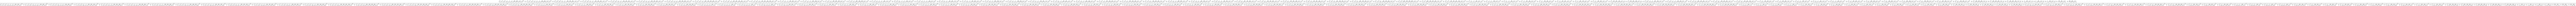

In [11]:
U_sym[v1]

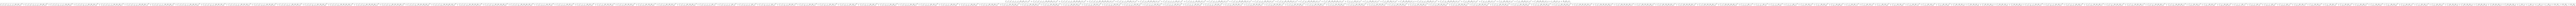

In [12]:
U_sym[v2]

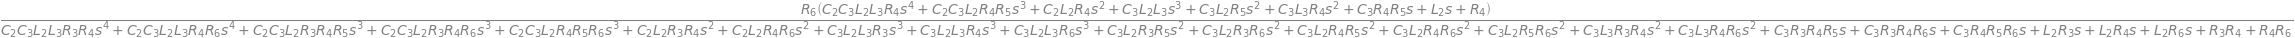

In [14]:
(U_sym[v2]/U_sym[v1]).simplify()

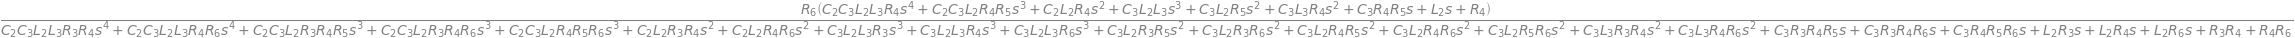

In [15]:
(U_sym[v2]/U_sym[v1]).nsimplify().simplify().expand().together()